# <b>Assignment : DT</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import sparse
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
import seaborn as sns
import nltk
import re
import pickle


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


<font color='red'><b> Please check below video before attempting this assignment</b></font>

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('https://youtu.be/Ccy1UuhPY4A', width="10000",height="500")

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

In [3]:
#please use below code to load glove vectors 
import pickle

with open('/content/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

    

or else , you can use below code

In [4]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 3, 10, 30], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

# <font color='red'><b> Task - 2 </b></font>

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<font color='blue'><b>Hint for calculating Sentiment scores</b></font>

In [5]:
# import nltk
# nltk.download('vader_lexicon')

<h1> Decision Tree </h1>

# <font color='red'> <b>Task - 1</b></font>

## 1.1 Loading Data

In [153]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
import pandas
data = pandas.read_csv('/content/preprocessed_data (1).csv')

In [154]:
# write your code in following steps for task 1
# 1. calculate sentiment scores for the essay feature 
# 2. Split your data.
# 3. perform tfidf vectorization of text data.
# 4. perform tfidf w2v vectorization of text data.
# 5. perform encoding of categorical features.
# 6. perform encoding of numerical features
# 7. For task 1 set 1 stack up all the features
# 8. For task 1 set 2 stack up all the features (for stacking dense features you can use np.stack)
# 9. Perform hyperparameter tuning and plot either heatmap or 3d plot.
# 10. Find the best parameters and fit the model. Plot ROC-AUC curve(using predict proba method)
# 11. Plot confusion matrix based on best threshold value
# 12. Find all the false positive data points and plot wordcloud of essay text and pdf of teacher_number_of_previously_posted_projects.
# 13. Write your observations about the wordcloud and pdf.

In [155]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [156]:
data = pd.read_csv('/content/preprocessed_data (1).csv')

In [157]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [158]:
negative = []
positive = []
neutral = []
compound = []

def update_sentiments(values):
    negative.append(values["neg"])    
    positive.append(values["pos"])
    neutral.append(values["neu"])
    compound.append(values["compound"])

In [159]:
from tqdm import tqdm          
for essay in tqdm(data["essay"]):                  
    update_sentiments(sid.polarity_scores(essay))

100%|██████████| 109248/109248 [02:49<00:00, 644.26it/s]


In [160]:
data["neg"] = negative   
data["pos"] = positive
data["neu"] = neutral                # adding new features to dataset based on  Sentiment Intensity Analyzer
data["compound"] = compound

In [161]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')


sid = SentimentIntensityAnalyzer()


sentence= essay
ss_1 = sid.polarity_scores(sentence)
print('sentiment score for sentence 1',ss_1)

sentiment score for sentence 1 {'neg': 0.038, 'neu': 0.641, 'pos': 0.321, 'compound': 0.9913}


In [162]:
data.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,0.013,0.205,0.783,0.9867


**Splitting Data Into Train And Cross Validation(or test): Stratified Sampling**

In [163]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y,random_state=42) 


In [165]:
print("Total data points in Train Dataset =",len(y_train))
print("Total data points in Test Dataset =",len(y_test))

Total data points in Train Dataset = 73196
Total data points in Test Dataset = 36052


#Make Data Model Ready: Encoding Eassay(text feature)
##TFIDF Vectorizer

In [166]:
#  HERE WE ARE INTILIZING THE TFIDF VECTORIZER SAMPLE OF DATASET 50000 AS PER INSTRUCTION 

tfidfvectorizer = TfidfVectorizer(min_df=10,max_features=50000)
# FITTING THE  DATA

text_tfidf = tfidfvectorizer.fit(X_train['essay'].values) #fitting
# TRANSFORMING THE BOTH TRAIN AND TEST 

X_train_essay_tfidf =tfidfvectorizer.transform(X_train['essay'].values) 
X_test_essay_tfidf =tfidfvectorizer.transform(X_test['essay'].values)   # transform    

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("==>"*50)

After vectorizations
(73196, 14266) (73196,)
(36052, 14266) (36052,)
==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>


#TFIDF W2V
#**loading the data in pickle file**


In [167]:
import pickle     
with open('glove_vectors', 'rb') as f:              
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [168]:
# REFER : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'].values)
# here we are intilizing the tfidf vectorizer on text feature essay 

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [169]:
#TFIDF W2V for train dataset
train_tfidf_w2v_essays = [] # the tfidf-w2v for each essay is stored in this list

#  PERPOSE FOR USING TQDM LIBRARY IS THAT SEE THE PROGRESS OF CODE 
for sentence in tqdm(X_train['essay']): 

    # CREATING THE MATRIX OF SIZE 300 USING NUMPY.ZERO 
    vector = np.zeros(300) 

    # HERE WE WILL INTILIZE THE VARIABLE TFIDF 
    tf_idf_weight =0; 

    # HERE WE SPILLITED THE WORD IN SENTENCE TO PERFORM CALCULATE THE TERM FREQUENCY 
    for word in sentence.split():

      # TAKING THE WORD FROM GLOVE VECTOR FILE 

      # REFER : https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] 

            # HERE SIMPLE EXTUTION OF FORMULA COMPUTING THE TFIDF 
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
# INCREMENTING THE VARIABLE VECTOR 
            vector += (vec * tf_idf) 

            # COMPUTING THE WEIGHTED TFIDF 
            tf_idf_weight += tf_idf
# CHECKING THE tf_idf_weight NOT EQUAL TO 0
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
        # ADDINNG THE VECTOR 
    train_tfidf_w2v_essays.append(vector)
X_train_essay_tfidf_w2v= sparse.csr_matrix(train_tfidf_w2v_essays)   # CALCULATING THE VALUE TFIDF ON TRAIN DATASET 
print("After vectorizations")
print(X_train_essay_tfidf_w2v.shape, y_train.shape)
print("="*100)

100%|██████████| 73196/73196 [02:03<00:00, 590.84it/s]


After vectorizations
(73196, 300) (73196,)


In [170]:
#TFIDF W2V for test dataset
test_tfidf_w2v_essays = [] # the tfidf-w2v for each essay is stored in this list

#  PERPOSE FOR USING TQDM LIBRARY IS THAT SEE THE PROGRESS OF CODE 
for sentence in tqdm(X_test['essay']): 

      # CREATING THE MATRIX OF SIZE 300 USING NUMPY.ZERO 
    vector = np.zeros(300) 

  # HERE WE WILL INTILIZE THE VARIABLE TFIDF 
    tf_idf_weight =0; 

    # HERE WE SPILLITED THE WORD IN SENTENCE TO PERFORM CALCULATE THE TERM FREQUENCY 
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] 

    # HERE SIMPLE EXTUTION OF FORMULA COMPUTING THE TFIDF 
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
     
        # INCREMENTING THE VARIABLE VECTOR 
            vector += (vec * tf_idf) 

                # COMPUTING THE WEIGHTED TFIDF 

            tf_idf_weight += tf_idf

            # CHECKING THE tf_idf_weight NOT EQUAL TO 0
    if tf_idf_weight != 0:
      
        vector /= tf_idf_weight
    test_tfidf_w2v_essays.append(vector)

     # CALCULATING THE VALUE TFIDF ON TRAIN DATASET 
X_test_essay_tfidf_w2v= sparse.csr_matrix(test_tfidf_w2v_essays)


print("After vectoring")
print(X_test_essay_tfidf_w2v.shape, y_train.shape)
print("="*100)

100%|██████████| 36052/36052 [01:00<00:00, 594.25it/s]


After vectoring
(36052, 300) (73196,)


#Encoding Categorical Features: School State


In [171]:
vectorizer_state = CountVectorizer()
vectorizer_state.fit(X_train['school_state'].values) # fitting

X_train_state_ohe = vectorizer_state.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer_state.transform(X_test['school_state'].values) #transform
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print("==>"*50)


After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>


#Encoding Categorical Features: teacher_prefix


In [172]:
vectorizer_prefix= CountVectorizer()
vectorizer_prefix.fit(X_train['teacher_prefix'].values) # fitting 

X_train_teacher_ohe = vectorizer_prefix.transform(X_train['teacher_prefix'].values) #transform
X_test_teacher_ohe = vectorizer_prefix.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print("=>"*50)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


#Encoding Categorical Features: project_grade_category


In [173]:
vectorizer_grade = CountVectorizer()
vectorizer_grade.fit(X_train['project_grade_category'].values) # fitting 

X_train_grade_ohe = vectorizer_grade.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer_grade.transform(X_test['project_grade_category'].values) #transform


print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print("=>"*50)


After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


#Encoding Categorical Features: clean_categories


In [174]:
vectorizer_category = CountVectorizer()
vectorizer_category.fit(X_train['clean_categories'].values) # fitting 

X_train_category_ohe = vectorizer_category.transform(X_train['clean_categories'].values)#transform
X_test_category_ohe = vectorizer_category.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_category_ohe.shape, y_train.shape)
print(X_test_category_ohe.shape, y_test.shape)
print("=>"*50)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


# Encoding Categorical Features: clean_subcategories


In [175]:
vectorizer_sub = CountVectorizer()
vectorizer_sub.fit(X_train['clean_subcategories'].values) # fitting

X_train_subcategory_ohe = vectorizer_sub.transform(X_train['clean_subcategories'].values)  #transform
X_test_subcategory_ohe = vectorizer_sub.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_subcategory_ohe.shape, y_train.shape)
print(X_test_subcategory_ohe.shape, y_test.shape)
print("=>"*50)                    



After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


#Encoding Numerical Features
##Encoding Numerical Feature :price

In [176]:
from sklearn.preprocessing import MinMaxScaler
price_scalar = MinMaxScaler()
X_train_price = price_scalar.fit_transform(X_train['price'].values.reshape(-1, 1))
X_test_price = price_scalar.transform(X_test['price'].values.reshape(-1, 1))



                                                                                                             
print("After vectorizations")
print(X_train_price.shape, y_train.shape)
print(X_test_price.shape, y_test.shape)
print("=>"*50)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)
=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>


#Encoding Numerical Features:teacher_number_of_previously_posted_projects


In [177]:
from sklearn.preprocessing import MinMaxScaler       # USING MINMAX SCALER TO AVOID DIMENSIONAL ERROR 
teacher_number_of_previously_posted_projects_scaler = MinMaxScaler()     # HERE WE ARE SCALLING THE FEATURE 


 # USING FIT_TRANFORM TO FITTING THE DATA 
X_train_teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects_scaler.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects = teacher_number_of_previously_posted_projects_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print(" after vecterazation ")
("=>"*100)
print(X_train_teacher_number_of_previously_posted_projects.shape , y_train.shape)       # PRINT THE SHAPE 
print(X_test_teacher_number_of_previously_posted_projects.shape , y_test.shape)

 after vecterazation 
(73196, 1) (73196,)
(36052, 1) (36052,)


#Encoding Numerical Features:neg

In [178]:
from sklearn.preprocessing import MinMaxScaler         # USING MINMAX SCALER TO AVOID DIMENSIONAL ERROR 
neg_scalar = MinMaxScaler()                                          # HERE WE ARE SCALLING THE FEATURE 

# USING FIT_TRANFORM TO FITTING THE DATA 
X_train_neg = neg_scalar.fit_transform(X_train['neg'].values.reshape(-1, 1))
X_test_neg = neg_scalar.transform(X_test['neg'].values.reshape(-1, 1))


                                                                                                             
print("After vectorizations")
print('='* 100)
print(X_train_neg.shape, y_train.shape)  # PRINT THE SHAPE 
print(X_test_neg.shape, y_test.shape)


After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


#Encoding Numerical Features:pos

In [179]:
pos_scaler = MinMaxScaler()     # # USING MINMAX SCALER TO AVOID DIMENSIONAL ERROR 

# HERE WE ARE SCALLING THE FEATURE
X_train_pos = pos_scaler.fit_transform(X_train['pos'].values.reshape(-1,1))
X_test_pos = pos_scaler.transform(X_test['pos'].values.reshape(-1,1))

print(" after vectorization")

print(X_train_pos.shape , y_train.shape)           # PRINT THE SHAPE 
print(X_test_pos.shape , y_test.shape)

 after vectorization
(73196, 1) (73196,)
(36052, 1) (36052,)


#Encoding Numerical Features:neu

In [180]:
neu_scaler = MinMaxScaler()                    # USING MINMAX SCALER TO AVOID DIMENSIONAL ERROR 

 # HERE WE ARE SCALLING THE FEATURE
X_train_neu = neu_scaler.fit_transform(X_train['neu'].values.reshape(-1,1))
X_test_neu = neu_scaler.transform(X_test['neu'].values.reshape(-1,1))

print(" after vectorization")

print(X_train_neu.shape , y_train.shape)     # PRINT THE SHAPE 
print(X_test_neu.shape , y_test.shape)

 after vectorization
(73196, 1) (73196,)
(36052, 1) (36052,)


#Encoding Numerical Features:compound

In [181]:
compound_scaler = MinMaxScaler()             # # USING MINMAX SCALER TO AVOID DIMENSIONAL ERROR 

# HERE WE ARE SCALLING THE FEATURE
X_train_compound = compound_scaler.fit_transform(X_train['compound'].values.reshape(-1,1))
X_test_compound = compound_scaler.transform(X_test['compound'].values.reshape(-1,1))

print(" after vectorization")

print(X_train_compound.shape , y_train.shape)          # PRINT THE SHAPE 
print(X_test_compound.shape , y_test.shape)

 after vectorization
(73196, 1) (73196,)
(36052, 1) (36052,)


#Concatinating All The Features
##SET-1
##Set 1: categorical, numerical features + preprocessed_eassay (TFIDF)

In [182]:
from scipy.sparse import hstack
X_tr_set_one = hstack((X_train_essay_tfidf, 
                       X_train_state_ohe,
                       X_train_teacher_ohe,
                       X_train_grade_ohe,
                       X_train_price,                   # STACKING THE ALL TRAIN TFIDF FEATURES 
                       X_train_category_ohe,
                       X_train_subcategory_ohe,
                       X_train_teacher_number_of_previously_posted_projects,
                       X_train_neg,
                       X_train_pos,
                       X_train_neu,
                       X_train_compound)).tocsr()


X_te_set_one = hstack((X_test_essay_tfidf, 
                       X_test_state_ohe,
                       X_test_teacher_ohe,
                       X_test_grade_ohe,
                       X_test_price,                   # STACKING ALL TEST TFIDF FEATURES 
                       X_test_category_ohe,
                       X_test_subcategory_ohe,
                       X_test_teacher_number_of_previously_posted_projects,
                       X_test_neg,
                       X_test_pos,
                       X_test_neu,
                       X_test_compound)).tocsr()


print("SHAPE OF TRAIN AND TEST AFTER STACKING")
print(X_tr_set_one.shape, y_train.shape)
print(X_te_set_one.shape, y_test.shape)
print("="*100)


SHAPE OF TRAIN AND TEST AFTER STACKING
(73196, 14371) (73196,)
(36052, 14371) (36052,)


In [183]:
from scipy.sparse import hstack





X_tr_set_two = hstack((X_train_essay_tfidf_w2v, 
                       X_train_state_ohe,
                       X_train_teacher_ohe,
                       X_train_grade_ohe,
                       X_train_price,                 # STACKING ALL TRAIN TFIDF+W2V FEATURES
                       X_train_category_ohe,
                       X_train_subcategory_ohe,
                       X_train_teacher_number_of_previously_posted_projects,
                       X_train_neg,
                       X_train_pos,
                       X_train_neu,
                       X_train_compound)).tocsr()


X_te_set_two = hstack((X_test_essay_tfidf_w2v, 
                       X_test_state_ohe,
                       X_test_teacher_ohe,               # STACKING ALL TEST  TFIDF+W2V FEATURES
                       X_test_grade_ohe,
                       X_test_price,
                       X_test_category_ohe,
                       X_test_subcategory_ohe,
                       X_test_teacher_number_of_previously_posted_projects,
                       X_test_neg,
                       X_test_pos,
                       X_test_neu,
                       X_test_compound)).tocsr()




print("SHAPE OF TRAIN AND TEST AFTER STACKING")
print(X_tr_set_two.shape,  y_train.shape)
print(X_te_set_two.shape,  y_test.shape)




SHAPE OF TRAIN AND TEST AFTER STACKING
(73196, 405) (73196,)
(36052, 405) (36052,)


In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_parameters = {'max_depth': [1, 5, 10, 50],   # MAX DEPTH WE HAVE TAKEN 50
                  'min_samples_split': [5, 10, 100, 500]}   #  NUMBER OF min_samples_split 


decision_tree= DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(decision_tree, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr_set_one,y_train)       # FITTING THE STACKED X_TRAIN AND Y_TRAIN INTO OUR ALGO 


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [185]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [186]:
#HERE I M TRYING TO GET THE BEST VALUE FOR ALGO  
print('Best score: ',clf.best_score_)

# THE I M TRYING TO FINDOUT THAT WHAT SHOULD BE BEST VALUE FOR GBDT PARAMETERS VALUE 
print('Best Hyper parameters: ',clf.best_params_)

Best score:  0.6486284489716533
Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}


#Plotting Hyperparameter v/s Auc
Roc Plot Of Train And Test Data
Train data

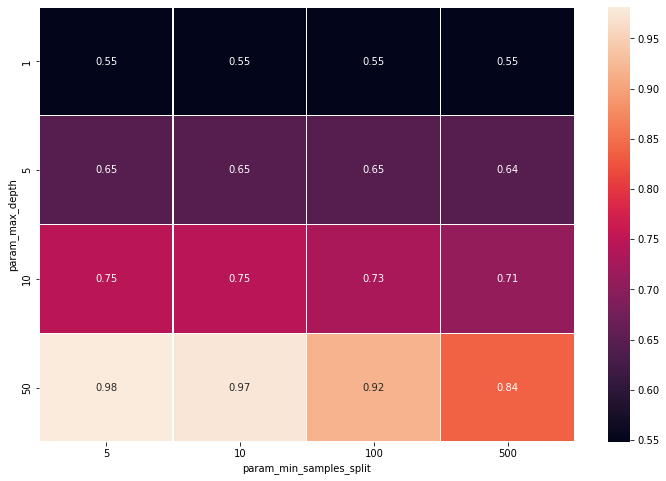

In [187]:
# HERE WE WILL TRY TO SHOW HEAT MAP FOR 

# REFER : https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_train_score', index='param_max_depth', 
     columns='param_min_samples_split') 

 # GIVING SIZE 
plt.figure(figsize=(12,8))
ax=sns.heatmap(pvt,annot=True,linewidths=.10)

#Heat map on test data

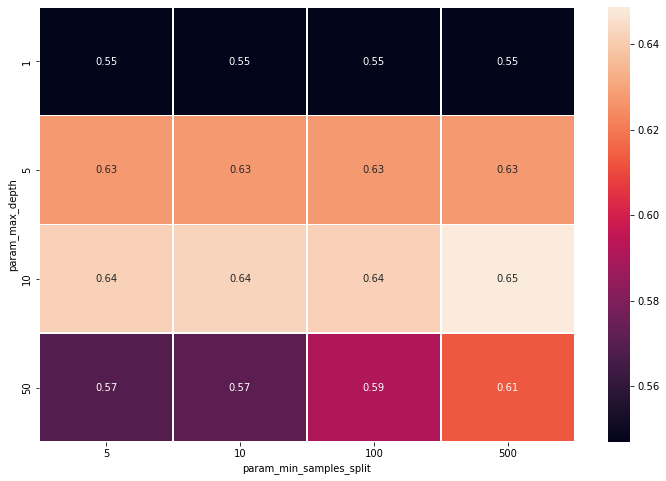

In [188]:
import pandas as pd

# HERE PLOTTING HEAT MAP FOR TEST DATA 


 #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_max_depth', 
    columns='param_min_samples_split') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

    # GIVING SIZE TO HEATMAP
plt.figure(figsize=(12,8))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

#Roc Plot Of Train And Test Data


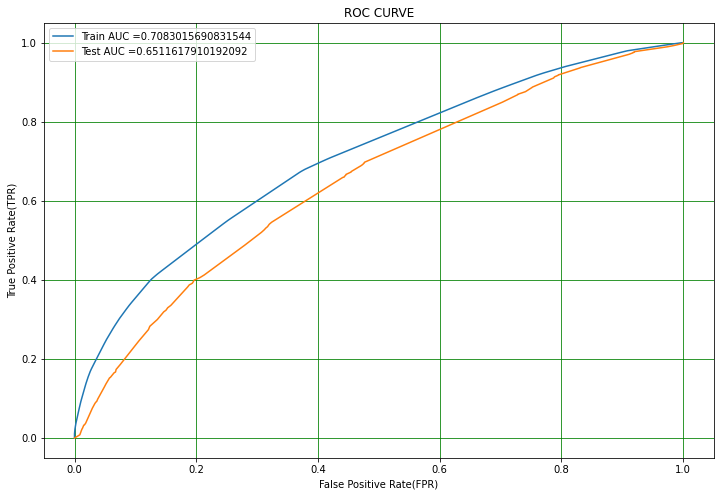

In [189]:
model_set1=DecisionTreeClassifier(class_weight='balanced',max_depth = clf.best_params_["max_depth"],min_samples_split = clf.best_params_["min_samples_split"])
model_set1.fit(X_tr_set_one,y_train)

# converting train and test output into probability

y_train_probs = clf.predict_proba(X_tr_set_one)[:,1] # converting train and test output into probability
y_test_probs= clf.predict_proba(X_te_set_one )[:,1]

 # storing values of fpr and tpr

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

# NOW WE LABEL THE PLOT X AND Y 
plt.figure(figsize=(12,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")

# TITLE OF THE CURVE IS ROC CURVE 
plt.title("ROC CURVE")

# DEFINING THE GRID PARAMETERS 
plt.grid(color='green',lw=0.8)

# confusion matrix

In [190]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]

        # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high

    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# DEFINING THE THRESHOLD VALUE IF VALUE GREATHER THAN THRESHOLD THEN 1 AND IF ITS LESS THAN THEN ITS 0
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# TRAIN DATA

the maximum value of tpr*(1-fpr) 0.4235345867948362 for threshold 0.508
CONFUSION MATRIX OF TRAIN DATA


[[ 6987  4096]
 [20384 41729]]


Text(0.5, 1.0, 'Train Data Confusion Matrix')

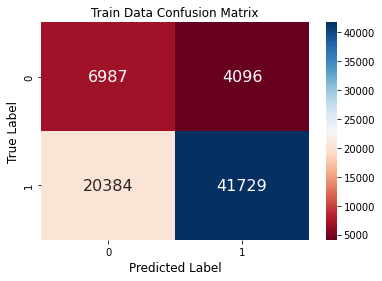

In [191]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
# PLOTTING THE CONFUSION MATRIX OF TRAIN DATA 

confusion_matrix=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='RdBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)


#Test Data


the maximum value of tpr*(1-fpr) 0.3693829056590241 for threshold 0.431
CONFUSION MATRIX OF TEST DATA


[[ 3024  2435]
 [10193 20400]]


Text(0.5, 1.0, 'Test Data Confusion Matrix')

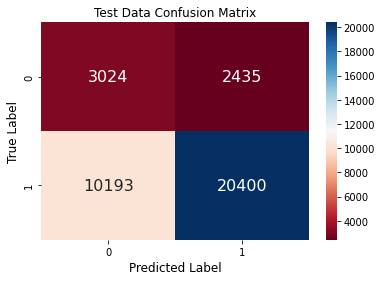

In [192]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
confusion_matrix=metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t))
# PLOTTING THE CONFUSION MATRIX OF TRAIN DATA 

  
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='RdBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)

#Getting All the False Positive Data Points


In [193]:
predict=predict_with_best_t(y_test_probs,best_t)

In [194]:
fpi = []
for i in range(len(y_test)):
    if(y_test[i]==0) & (predict[i] == 1):
        fpi.append(i) # GETTING THE ALL FALSE POSITIVE INDICES
len(fpi)

2435

In [195]:
import pandas as pd
cols = X_test.columns
X_test_false_Positive = pd.DataFrame(columns=cols) # MAKING THE FALSE POSITIVE DATAFRAME
X_test_false_Positive=X_test.iloc[fpi]    
print(X_test_false_Positive.shape)   

(2435, 12)


In [196]:
X_test_false_Positive.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
69487,sc,mrs,grades_3_5,10,literacy_language math_science,literacy mathematics,many students english language learners hard w...,228.89,0.039,0.242,0.719,0.9794


**wordcloud Of Essay Text For False Positive Dataset**


In [197]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for word in X_test_false_Positive['essay']:
    val = str(word)                #https://www.geeksforgeeks.org/generating-word-cloud-python/
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

In [198]:
wordcloud = WordCloud(width = 900, height = 900, background_color ='white', stopwords = stopwords, min_font_size = 12).generate(comment_words)


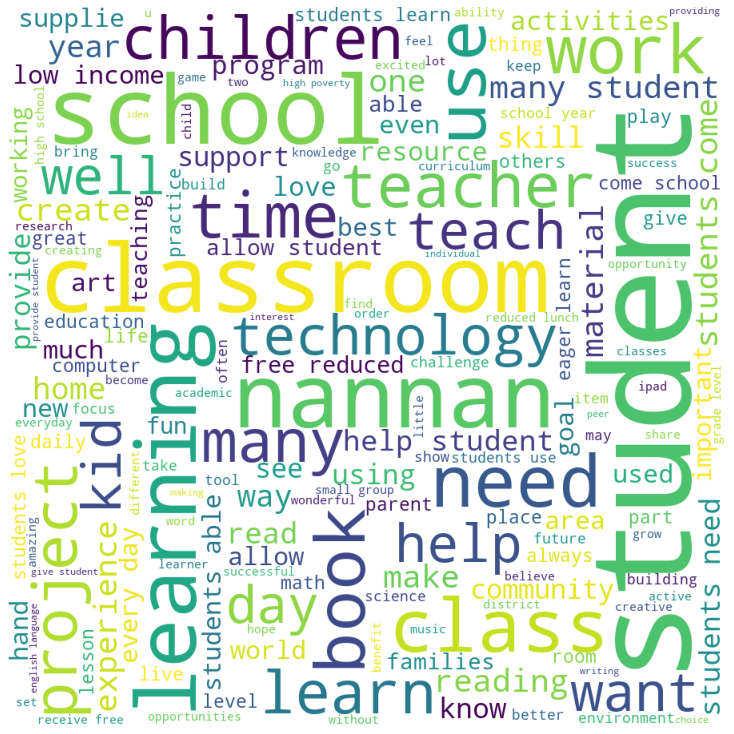

In [199]:
plt.figure(figsize = (10, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#Box Plot With The Price Of These False Positive Data Points


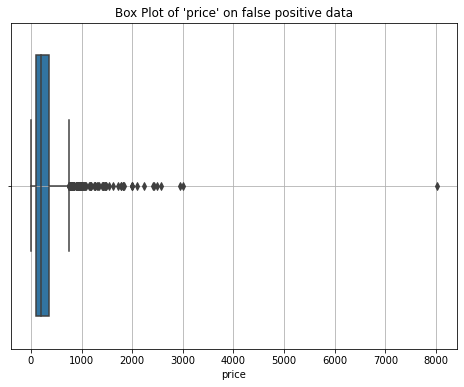

In [200]:
plt.figure(figsize=(8,6))
sns.boxplot('price',data=X_test_false_Positive,orient="v").set_title("Box Plot of 'price' on false positive data")
plt.grid()

#Pdf Plot With The teacher_number_of_previously_posted_projects Of These False Positive Data Points


[8.73511294e-01 7.31006160e-02 2.58726899e-02 9.85626283e-03
 8.62422998e-03 2.87474333e-03 3.28542094e-03 1.64271047e-03
 4.10677618e-04 8.21355236e-04]
[  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

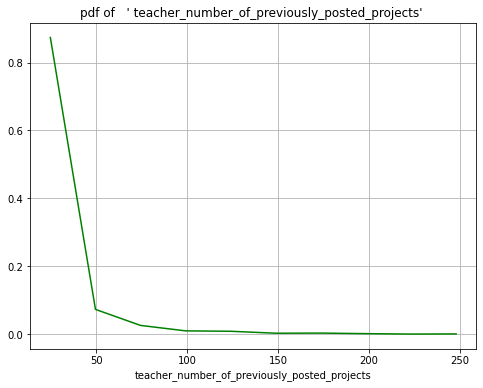

In [201]:
plt.figure(figsize=(8,6))
plt.grid()
counts, bin_edges = np.histogram(X_test_false_Positive['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,color="green")
plt.title("pdf of   ' teacher_number_of_previously_posted_projects' ")
plt.xlabel('teacher_number_of_previously_posted_projects')

#DECISION TREE USING GRID SEARCH CROSS VALIDATION (SET - 2)


In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
tree_parameters = {'max_depth': [1, 5, 10, 50], 
                  'min_samples_split': [5, 10, 100, 500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(decision_tree, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_tr_set_two,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [203]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [204]:
#HERE I M TRYING TO GET THE BEST VALUE FOR ALGO  
print('Best score: ',clf.best_score_)

# THE I M TRYING TO FINDOUT THAT WHAT SHOULD BE BEST VALUE FOR GBDT PARAMETERS VALUE 
print('Best Hyper parameters: ',clf.best_params_)

Best score:  0.6306250399675853
Best Hyper parameters:  {'max_depth': 5, 'min_samples_split': 500}


#Plotting Hyperparameter v/s Auc


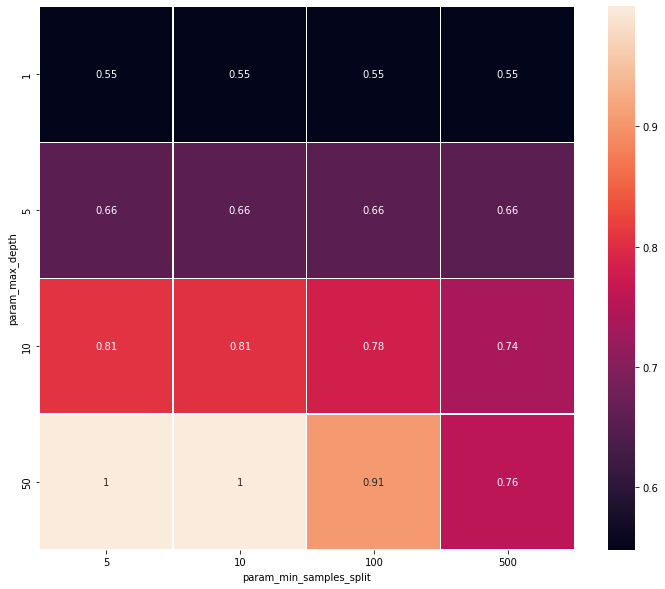

In [205]:
# HERE WE WILL TRY TO SHOW HEAT MAP FOR 

# REFER : https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_train_score', index='param_max_depth', 
     columns='param_min_samples_split') 

 # GIVING SIZE 
plt.figure(figsize=(12,10))
ax=sns.heatmap(pvt,annot=True,linewidths=.10)

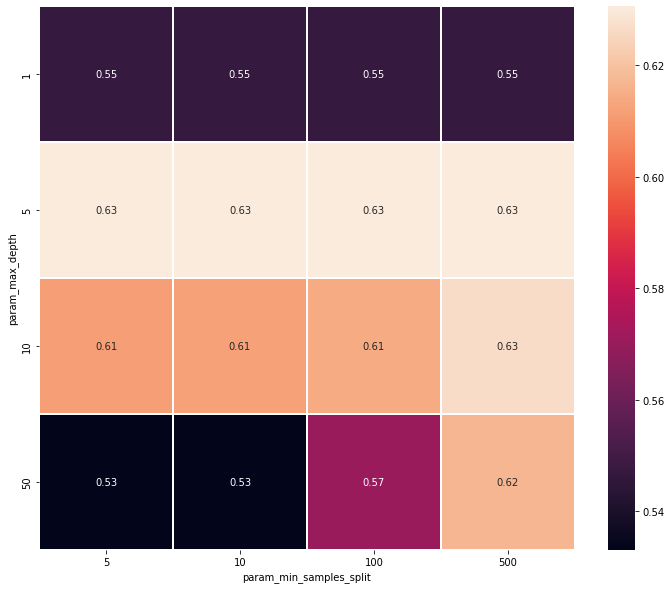

In [206]:
import pandas as pd

# HERE PLOTTING HEAT MAP FOR TEST DATA 


 #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_max_depth', 
    columns='param_min_samples_split') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

    # GIVING SIZE TO HEATMAP
plt.figure(figsize=(12,10))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

#Roc Plot Of Train And Test Data


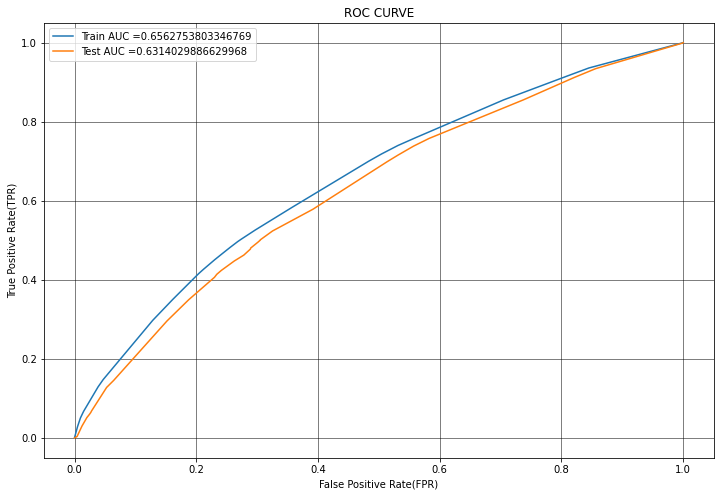

In [207]:
# refer : # REFER : https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

model_set1=DecisionTreeClassifier(class_weight='balanced',max_depth = clf.best_params_["max_depth"],min_samples_split = clf.best_params_["min_samples_split"])
model_set1.fit(X_tr_set_two,y_train)

# converting train and test output into probability

y_train_probs = clf.predict_proba(X_tr_set_two)[:,1] # converting train and test output into probability
y_test_probs= clf.predict_proba(X_te_set_two )[:,1]

 # storing values of fpr and tpr

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)

plt.figure(figsize=(12,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

# NOW WE LABEL THE PLOT X AND Y 
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")

# TITLE OF THE CURVE IS ROC CURVE 
plt.title("ROC CURVE")
plt.grid(color='black',lw=0.5)

#Confusion Matrix


In [208]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

# DEFINING THE THRESHOLD VALUE IF VALUE GREATHER THAN THRESHOLD THEN 1 AND IF ITS LESS THAN THEN ITS 0
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#Train data 

the maximum value of tpr*(1-fpr) 0.37494400607820144 for threshold 0.487
CONFUSION MATRIX OF TRAIN DATA


==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>
[[ 7126  3957]
 [25892 36221]]


Text(0.5, 1.0, 'Train Data Confusion Matrix')

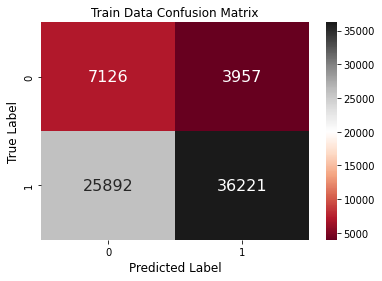

In [209]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
CONFUSION_MATRIX=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t))  


# REFER :  https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
# REFER :  https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print('==>'*50)
print(CONFUSION_MATRIX)
sns.heatmap(CONFUSION_MATRIX, annot=True, fmt='d',cmap='RdGy',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)

#test data

the maximum value of tpr*(1-fpr) 0.3533543080394498 for threshold 0.502
CONFUSION MATRIX OF TEST DATA


==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>==>
[[ 3683  1776]
 [14570 16023]]


Text(0.5, 1.0, 'Test Data Confusion Matrix')

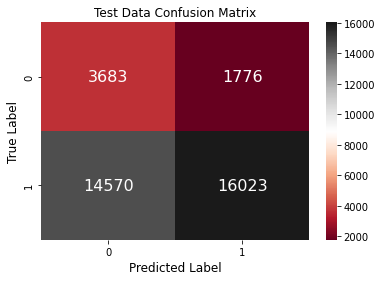

In [210]:
# REFER : https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
confusion_matrix =metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t))


# REFER :  https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
# REFER :  https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print('==>'*50)
print(confusion_matrix)       
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='RdGy',annot_kws = {"size":16})
plt.ylabel('True Label',size=12) 
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)

#Getting All the False Positive Data Points


In [211]:
predict=predict_with_best_t(y_test_probs,best_t)


In [212]:
fpi = []
for i in range(len(y_test)):
    if(y_test[i]==0) & (predict[i] == 1): #GETTING THE FALSE POSITIVE INDICES
        fpi.append(i)
len(fpi)

1776

In [213]:
import pandas as pd
cols = X_test.columns
X_test_false_Positive = pd.DataFrame(columns=cols) # MAKING THE FALSE POSITIVE DATAFRAME
X_test_false_Positive=X_test.iloc[fpi]    
print(X_test_false_Positive.shape)  

(1776, 12)


In [214]:
X_test_false_Positive.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,neg,pos,neu,compound
69487,sc,mrs,grades_3_5,10,literacy_language math_science,literacy mathematics,many students english language learners hard w...,228.89,0.039,0.242,0.719,0.9794


#wordcloud Of Essay Text For False Positive Dataset










In [215]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for word in X_test_false_Positive['essay']:
    val = str(word)                #https://www.geeksforgeeks.org/generating-word-cloud-python/
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

In [216]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 12).generate(comment_words)


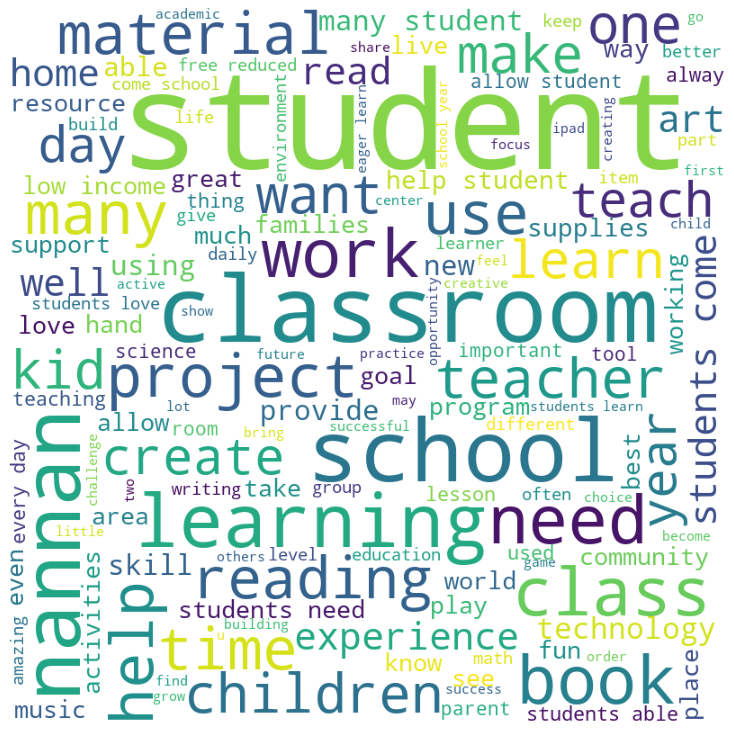

In [217]:
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#Box Plot With The Price Of These False Positive Data Points


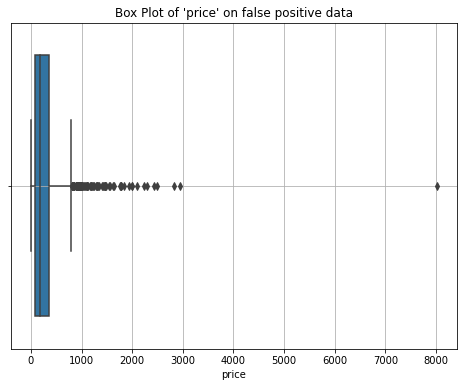

In [218]:
plt.figure(figsize=(8,6))
sns.boxplot('price',data=X_test_false_Positive,orient="v").set_title("Box Plot of 'price' on false positive data")
plt.grid()

#Pdf Plot With The teacher_number_of_previously_posted_projects Of These False Positive Data Points


[8.30518018e-01 1.01914414e-01 3.09684685e-02 1.35135135e-02
 1.18243243e-02 3.94144144e-03 3.37837838e-03 2.25225225e-03
 1.12612613e-03 5.63063063e-04]
[  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

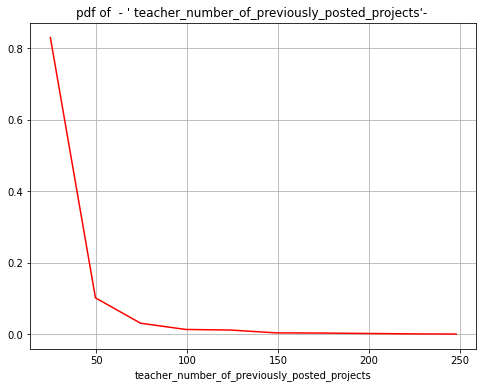

In [219]:
plt.figure(figsize=(8,6))
plt.grid()
counts, bin_edges = np.histogram(X_test_false_Positive['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,color="red")
plt.title("pdf of  - ' teacher_number_of_previously_posted_projects'- ")
plt.xlabel('teacher_number_of_previously_posted_projects')

# <font color='red'> <b>Task - 2</b></font>
##Selecting All The Features Which Are Having Non-Zero Feature Importance(Set -1)

In [220]:
# 1. write your code in following steps for task 2
# 2. select all non zero features
# 3. Update your dataset i.e. X_train,X_test and X_cv so that it contains all rows and only non zero features
# 4. perform hyperparameter tuning and plot either heatmap or 3d plot.
# 5. Fit the best model. Plot ROC AUC curve and confusion matrix similar to model 1.

In [221]:
from scipy.sparse import hstack
X_train_set_one = hstack((X_train_essay_tfidf, 
                       X_train_state_ohe,
                       X_train_teacher_ohe,
                       X_train_grade_ohe,
                       X_train_price,
                       X_train_category_ohe,
                       X_train_subcategory_ohe,
                       X_train_teacher_number_of_previously_posted_projects,
                       X_train_neg,
                       X_train_pos,
                       X_train_neu,
                       X_train_compound)).tocsr()


X_test_set_one = hstack((X_test_essay_tfidf, 
                       X_test_state_ohe,
                       X_test_teacher_ohe,
                       X_test_grade_ohe,
                       X_test_price,
                       X_test_category_ohe,
                       X_test_subcategory_ohe,
                       X_test_teacher_number_of_previously_posted_projects,
                       X_test_neg,
                       X_test_pos,
                       X_test_neu,
                       X_test_compound)).tocsr()


print("SHAPE OF TRAIN AND TEST AFTER STACKING")
print(X_train_set_one.shape, y_train.shape)
print(X_test_set_one.shape, y_test.shape)
print("="*100)

SHAPE OF TRAIN AND TEST AFTER STACKING
(73196, 14371) (73196,)
(36052, 14371) (36052,)


# **Here i m using the hstack task1 data**

In [222]:
clf_feature= DecisionTreeClassifier(class_weight='balanced',max_depth=None,min_samples_split=500) 


In [223]:
clf_feature.fit(X_train_set_one,y_train)

DecisionTreeClassifier(class_weight='balanced', min_samples_split=500)

In [224]:
important_features = clf_feature.feature_importances_
# print the important feature 
len(important_features)

14371

In [225]:
non_zero_features=[]
for i in range(len(important_features)):
    if important_features[i]>0:             # FILTERING THE NON ZERO FEATURE IMPORTANT FEATURE INDICES
        non_zero_features.append(i)

In [226]:
print("NUMBER OF NON ZERO IMPORTANT FEATURES =" ,len(non_zero_features))


NUMBER OF NON ZERO IMPORTANT FEATURES = 1103


In [227]:
X_train_feature=X_train_set_one[:,non_zero_features]
X_test_feature=X_test_set_one[:,non_zero_features]   # CREATING NON ZERO FEATURE IMPORTANT DATASET

In [228]:
print("SHAPE OF TRAIN AND TEST OF NON ZERO IMPORTANT FEATURES")
print(X_train_feature.shape)
print(X_test_feature .shape)

SHAPE OF TRAIN AND TEST OF NON ZERO IMPORTANT FEATURES
(73196, 1103)
(36052, 1103)


In [229]:
tree_parameters = {'max_depth': [1, 5, 10, 50], 
                  'min_samples_split': [5, 10, 100, 500]}

decision_tree= DecisionTreeClassifier(class_weight='balanced') 
clf = GridSearchCV(decision_tree, tree_parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(X_train_feature,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 50],
                         'min_samples_split': [5, 10, 100, 500]},
             return_train_score=True, scoring='roc_auc')

In [230]:
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [231]:
print('Best score: ',clf.best_score_)
# finding the best parameter for model 
print('Best Hyper parameters: ',clf.best_params_)

Best score:  0.6537775645707175
Best Hyper parameters:  {'max_depth': 10, 'min_samples_split': 500}


#Plotting Hyperparameter v/s Auc

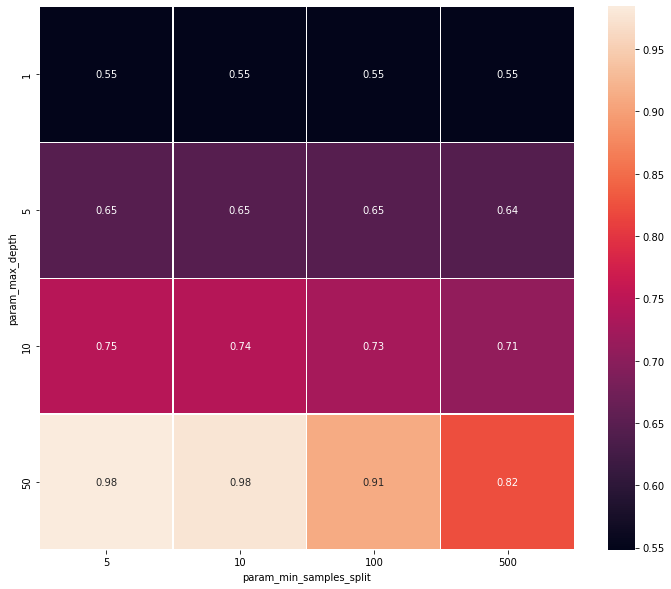

In [232]:
# HERE WE WILL TRY TO SHOW HEAT MAP FOR 

# REFER : https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_train_score', index='param_max_depth', 
     columns='param_min_samples_split') 

 # GIVING SIZE 
plt.figure(figsize=(12,10))
ax=sns.heatmap(pvt,annot=True,linewidths=.10)

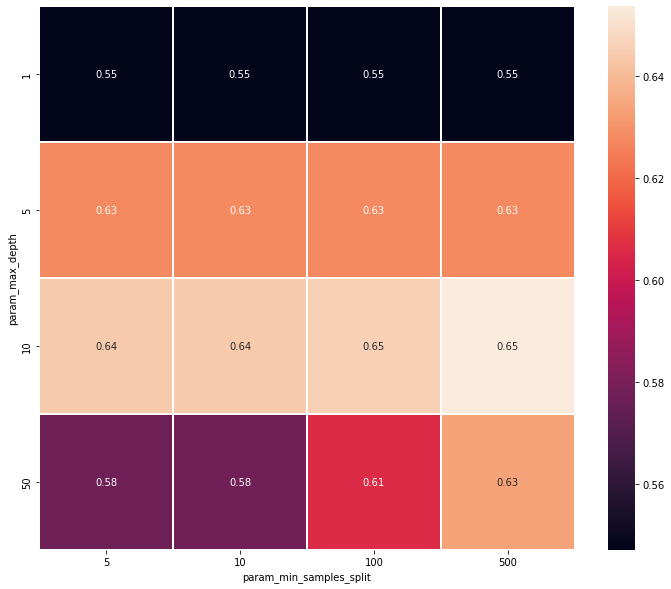

In [233]:
import pandas as pd

# HERE PLOTTING HEAT MAP FOR TEST DATA 


 #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

pvt = pd.pivot_table(pd.DataFrame(clf.cv_results_),
    values='mean_test_score', index='param_max_depth', 
    columns='param_min_samples_split') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search

    # GIVING SIZE TO HEATMAP
plt.figure(figsize=(12,10))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

#Roc Plot Of Train And Test Data


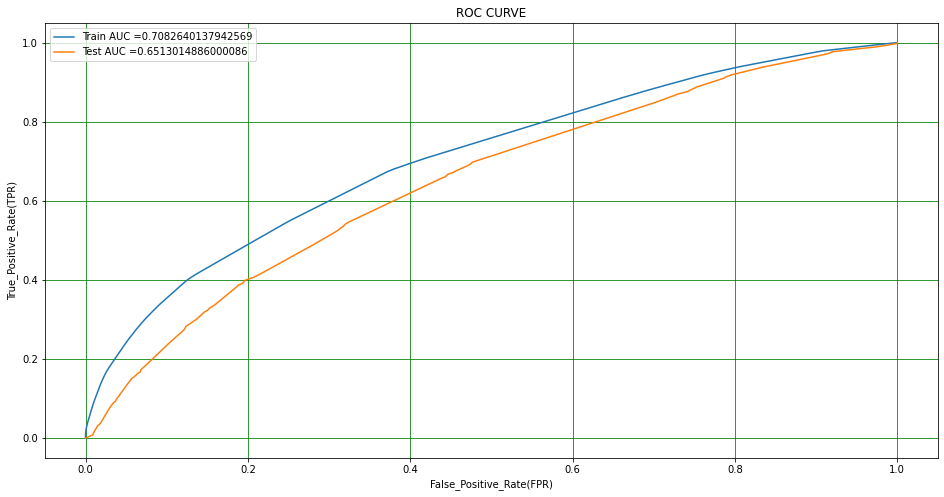

In [234]:
# refer : # REFER : https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

model_set1=DecisionTreeClassifier(class_weight='balanced',max_depth = clf.best_params_["max_depth"],min_samples_split = clf.best_params_["min_samples_split"])
model_set1.fit(X_train_set_one,y_train)

# converting train and test output into probability
y_train_probs = clf.predict_proba(X_train_feature)[:,1] # converting train and test output into probability
y_test_probs= clf.predict_proba(X_test_feature )[:,1]

 # storing values of fpr and tpr
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)


# PLOTING THE ROC CURVE 
plt.figure(figsize=(16,8))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()

# NOW WE LABEL THE PLOT X AND Y 
plt.xlabel("False_Positive_Rate(FPR)")
plt.ylabel("True_Positive_Rate(TPR)") 
# TITLE OF THE CURVE IS ROC CURVE 
plt.title("ROC CURVE")

# DEFINING THE GRID PARAMETERS 
plt.grid(color='green',lw=0.8)

#Confusion Matrix


In [235]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#Train Data


the maximum value of tpr*(1-fpr) 0.42345418712846794 for threshold 0.508
CONFUSION MATRIX OF TRAIN DATA


[[ 6984  4099]
 [20374 41739]]


Text(0.5, 1.0, 'Train Data Confusion Matrix')

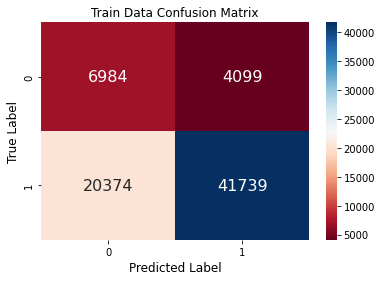

In [236]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
confusion_matrix=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs, best_t))  # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

print("CONFUSION MATRIX OF TRAIN DATA")
print("\n")
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='RdBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Train Data Confusion Matrix',size=12)

#Test Data


the maximum value of tpr*(1-fpr) 0.36952776170045903 for threshold 0.431
CONFUSION MATRIX OF TEST DATA


[[ 3024  2435]
 [10185 20408]]


Text(0.5, 1.0, 'Test Data Confusion Matrix')

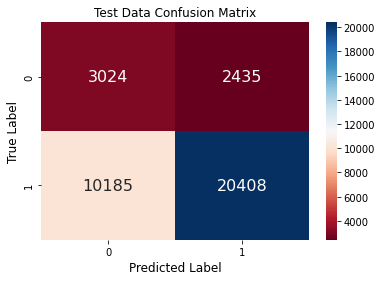

In [237]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
confusion_matrix=metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs, best_t))
  
print("CONFUSION MATRIX OF TEST DATA")
print('\n')
print(confusion_matrix)
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='RdBu',annot_kws = {"size":16})
plt.ylabel('True Label',size=12)
plt.xlabel('Predicted Label',size=12)
plt.title('Test Data Confusion Matrix',size=12)

#Getting All the False Positive Data Points


In [238]:
predict=predict_with_best_t(y_test_probs,best_t)


In [239]:
false_postive_index = []
for i in range(len(y_test)):
    if(y_test[i]==0) & (predict[i] == 1):
        false_postive_index.append(i)
len(false_postive_index)

2435

In [240]:
import pandas as pd
cols = X_test.columns
X_test_false_Positive = pd.DataFrame(columns=cols) # MAKING THE FALSE POSITIVE DATAFRAME
X_test_false_Positive=X_test.iloc[false_postive_index]    
print(X_test_false_Positive.shape)   

(2435, 12)


#wordcloud Of Essay Text For False Positive Dataset


In [241]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = ' '
stopwords = set(STOPWORDS)
for word in X_test_false_Positive['essay']:
    val = str(word)                #https://www.geeksforgeeks.org/generating-word-cloud-python/
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for words in tokens:
        comment_words = comment_words + words + ' '

In [242]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(comment_words)


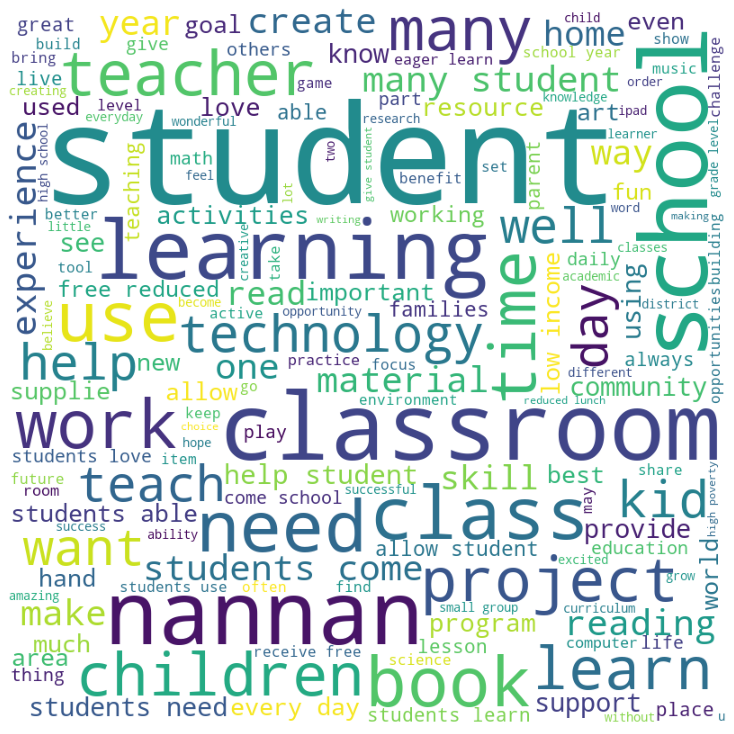

In [243]:
plt.figure(figsize = (12,10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

# **Observation : word_cloud**

*most word occurs*
**1.student**
**2.classroom**
**3. learning**
**4. nanan**
**5. school**
**etc**

#Box Plot With The Price Of These False Positive Data Points


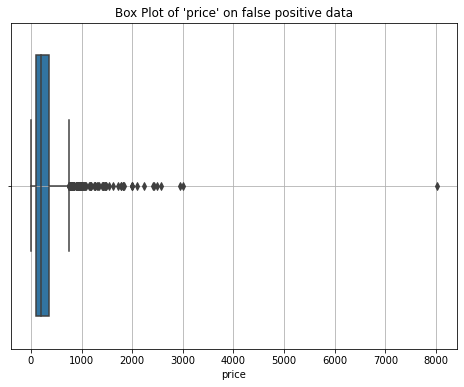

In [244]:
plt.figure(figsize=(8,6))
sns.boxplot('price',data=X_test_false_Positive,orient="v").set_title("Box Plot of 'price' on false positive data")
plt.grid()

#Pdf Plot With The teacher_number_of_previously_posted_projects Of These False Positive Data Points


[8.73511294e-01 7.31006160e-02 2.58726899e-02 9.85626283e-03
 8.62422998e-03 2.87474333e-03 3.28542094e-03 1.64271047e-03
 4.10677618e-04 8.21355236e-04]
[  0.   24.8  49.6  74.4  99.2 124.  148.8 173.6 198.4 223.2 248. ]


Text(0.5, 0, 'teacher_number_of_previously_posted_projects')

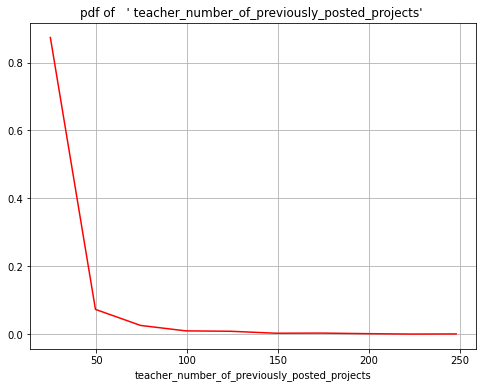

In [245]:
plt.figure(figsize=(8,6))
plt.grid()
counts, bin_edges = np.histogram(X_test_false_Positive['teacher_number_of_previously_posted_projects'], bins=10, 
                                density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
plt.plot(bin_edges[1:],pdf,color="red")
plt.title("pdf of   ' teacher_number_of_previously_posted_projects' ")
plt.xlabel('teacher_number_of_previously_posted_projects')

#Summary


In [246]:
from prettytable import PrettyTable
from prettytable import ALL as ALL
table=PrettyTable(hrules=ALL)
table.field_names = [ "Sl.N0","Vectorizer", "Model", "Hyper Parameter", "Train Auc" , " Test-AUC"] # # http://zetcode.com/python/prettytable/
table.add_row([1,"TFIDF", "DECSION TREE", "max_depth =10 , min_samples_split=500",0.7083056,0.65116179])
table.add_row([2,"TFIDF W2V", "DECSION TREE"," max_depth =5 , min_samples_split=500",0.65627538, 0.63140298])
table.add_row([3,"TFIDF NON ZERO FEATURE IMPORTANCE", "DECSION TREE", "max_depth =10 , min_samples_split=500",0.70826401,0.651301488])
print(table)

+-------+-----------------------------------+--------------+---------------------------------------+------------+------------+
| Sl.N0 |             Vectorizer            |    Model     |            Hyper Parameter            | Train Auc  |  Test-AUC  |
+-------+-----------------------------------+--------------+---------------------------------------+------------+------------+
|   1   |               TFIDF               | DECSION TREE | max_depth =10 , min_samples_split=500 | 0.7082043  | 0.6510151  |
+-------+-----------------------------------+--------------+---------------------------------------+------------+------------+
|   2   |             TFIDF W2V             | DECSION TREE |  max_depth =5 , min_samples_split=500 | 0.6562753  | 0.6314029  |
+-------+-----------------------------------+--------------+---------------------------------------+------------+------------+
|   3   | TFIDF NON ZERO FEATURE IMPORTANCE | DECSION TREE | max_depth =10 , min_samples_split=500 | 0.70830756

# **CONCLUSION**

#**NOT A BIG DEFFERENCE BETWEEN TRAIN AND TEST ACCURACY**

# **WE ARE NOT OVERFITTING OR UNDERFITTING ANYMORE HERE**

# **WHEN WE HAVE TAKEN NON ZERO VALUES IN THIRD MODEL NOT MUCH BIG DIFFERENCE**

# **INCREASING THE DEPTH OF TREE IMPROVING THE TRAIN ACCURACY SILIGHTLY BUT NOT MUCH**